In [35]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [37]:
# Add the latitude and longitudes to a list.
coordinates = list(lat_lngs)

In [38]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [39]:
# Import the requests library.
import requests

In [40]:
# Import the API key.
from config import weather_api_key

In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a0dce8dbcd22d81098f2f5929819f3a


In [42]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [43]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [44]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

# Create the counters.
record_count = 1
set_count = 1

Beginning Data Retrieval
------------------------


In [45]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | arman
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | nagorsk
Processing Record 7 of Set 1 | groton
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | stawell
Processing Record 10 of Set 1 | penzance
Processing Record 11 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 12 of Set 1 | kuala krai
City not found. Skipping...
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | cayenne
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | torbay
Processi

City not found. Skipping...
Processing Record 38 of Set 4 | kokopo
Processing Record 39 of Set 4 | khovu-aksy
Processing Record 40 of Set 4 | derzhavinsk
Processing Record 41 of Set 4 | khormuj
City not found. Skipping...
Processing Record 42 of Set 4 | rio grande
Processing Record 43 of Set 4 | ijaki
City not found. Skipping...
Processing Record 44 of Set 4 | pedasi
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | muros
Processing Record 47 of Set 4 | jaru
Processing Record 48 of Set 4 | mutoko
Processing Record 49 of Set 4 | chuy
Processing Record 50 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 5 | zhangjiakou
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | antalaha
Processing Record 4 of Set 5 | kalmunai
Processing Record 5 of Set 5 | avarua
Processing Record 6 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | nome
Processing Record 9 of

Processing Record 31 of Set 8 | camacha
Processing Record 32 of Set 8 | kayerkan
Processing Record 33 of Set 8 | cuamba
Processing Record 34 of Set 8 | port-gentil
Processing Record 35 of Set 8 | say
Processing Record 36 of Set 8 | pakxan
Processing Record 37 of Set 8 | port macquarie
Processing Record 38 of Set 8 | biak
Processing Record 39 of Set 8 | bonito
Processing Record 40 of Set 8 | timra
Processing Record 41 of Set 8 | oia
Processing Record 42 of Set 8 | san pedro de ycuamandiyu
Processing Record 43 of Set 8 | burica
City not found. Skipping...
Processing Record 44 of Set 8 | sept-iles
Processing Record 45 of Set 8 | kahului
Processing Record 46 of Set 8 | portland
Processing Record 47 of Set 8 | petatlan
Processing Record 48 of Set 8 | arnes
Processing Record 49 of Set 8 | atar
Processing Record 50 of Set 8 | mackay
Processing Record 1 of Set 9 | haibowan
City not found. Skipping...
Processing Record 2 of Set 9 | colquechaca
Processing Record 3 of Set 9 | mujiayingzi
Processi

Processing Record 21 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 22 of Set 12 | birjand
Processing Record 23 of Set 12 | lappeenranta
Processing Record 24 of Set 12 | mandal
Processing Record 25 of Set 12 | azimur
City not found. Skipping...
Processing Record 26 of Set 12 | zharkent
Processing Record 27 of Set 12 | yazman
Processing Record 28 of Set 12 | vila do maio
Processing Record 29 of Set 12 | villazon
Processing Record 30 of Set 12 | flagstaff
Processing Record 31 of Set 12 | terrace
Processing Record 32 of Set 12 | manicore
Processing Record 33 of Set 12 | caxito
Processing Record 34 of Set 12 | takapau
Processing Record 35 of Set 12 | almondbank
Processing Record 36 of Set 12 | ankazoabo
Processing Record 37 of Set 12 | chaumont
Processing Record 38 of Set 12 | dingle
Processing Record 39 of Set 12 | ruteng
-----------------------------
Data Retrieval Complete      
-----------------------------


In [46]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.15,68,43,23.80,PF,2021-07-26 21:30:18
1,Arman,59.7000,150.1667,57.79,85,92,6.08,RU,2021-07-26 21:30:18
2,Punta Arenas,-53.1500,-70.9167,42.91,75,0,13.80,CL,2021-07-26 21:27:10
3,Khatanga,71.9667,102.5000,59.02,67,49,16.80,RU,2021-07-26 21:30:18
4,Puerto Ayora,-0.7393,-90.3518,76.96,84,37,8.01,EC,2021-07-26 21:26:31
5,Nagorsk,59.3172,50.8078,56.07,97,99,8.03,RU,2021-07-26 21:30:19
6,Groton,41.3501,-72.0784,89.67,64,1,1.99,US,2021-07-26 21:27:13
7,Touros,-5.1989,-35.4608,77.90,80,2,11.72,BR,2021-07-26 21:30:19
8,Stawell,-37.0500,142.7667,39.40,90,5,8.68,AU,2021-07-26 21:30:19
9,Penzance,50.1186,-5.5371,63.61,85,100,13.91,GB,2021-07-26 21:30:20


In [47]:
# Reorder the columns
new_column_order = ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign DataFrame the new column order.
city_data_df = city_data_df[new_column_order]

In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

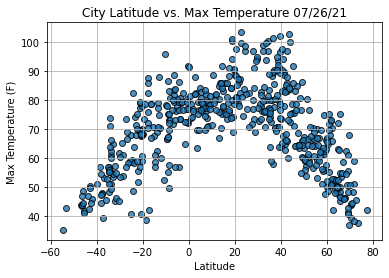

In [50]:
 # Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

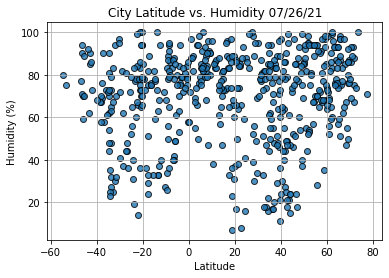

In [51]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

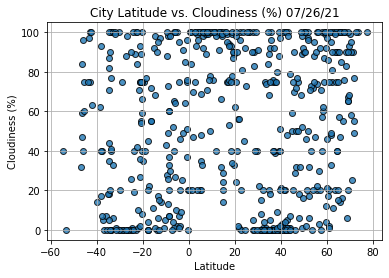

In [52]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

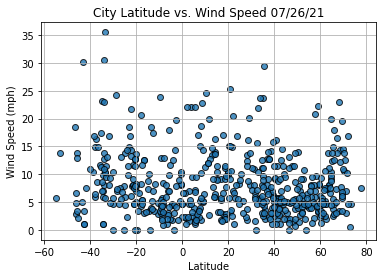

In [55]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()